In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
import matplotlib.dates as mdates

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])
df = df.sort_values("Timestamp").reset_index(drop=True)
print("Data loaded successfully:", df.shape)
display(df.head())

Data loaded successfully: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Dataset shape: (525600, 19)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cle

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN



Missing values per column:


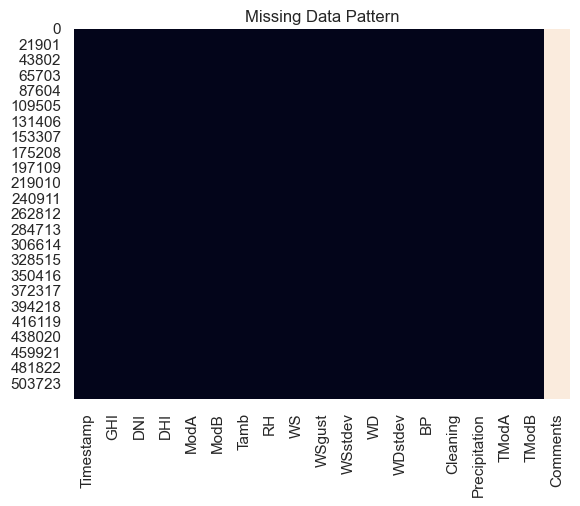

In [4]:
print("Dataset shape:", df.shape)
print("\nColumn information:")
df.info()

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
df.isna().sum()

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Pattern")
plt.show()

In [5]:
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Detect outliers
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

#before
print("Before cleaning:", df.shape)
# Remove outliers
df_clean = df[~outliers]
#after
print("After cleaning:", df_clean.shape)
print(f"Removed {outliers.sum()} outliers. Clean dataset shape: {df_clean.shape}")

Before cleaning: (525600, 19)
After cleaning: (494636, 19)
Removed 30964 outliers. Clean dataset shape: (494636, 19)


C:\Users\Kifiya\AppData\Local\Temp\ipykernel_5188\220492632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


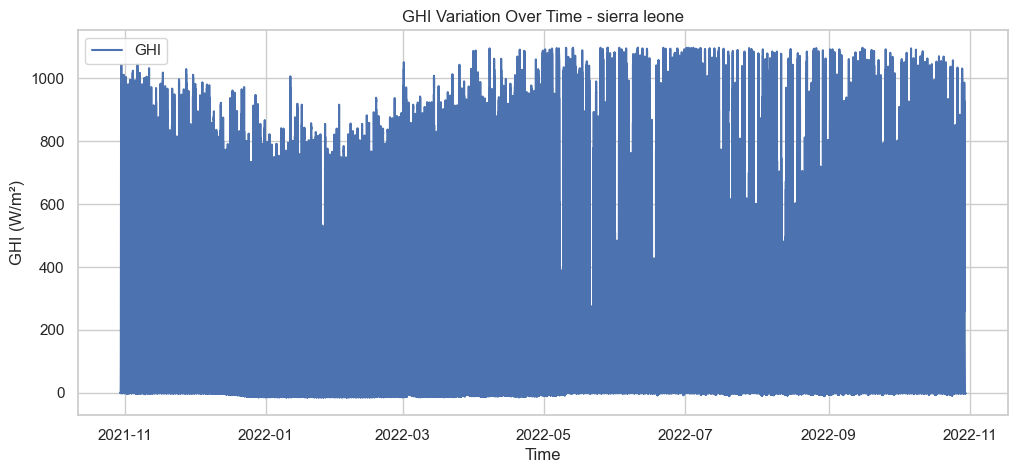

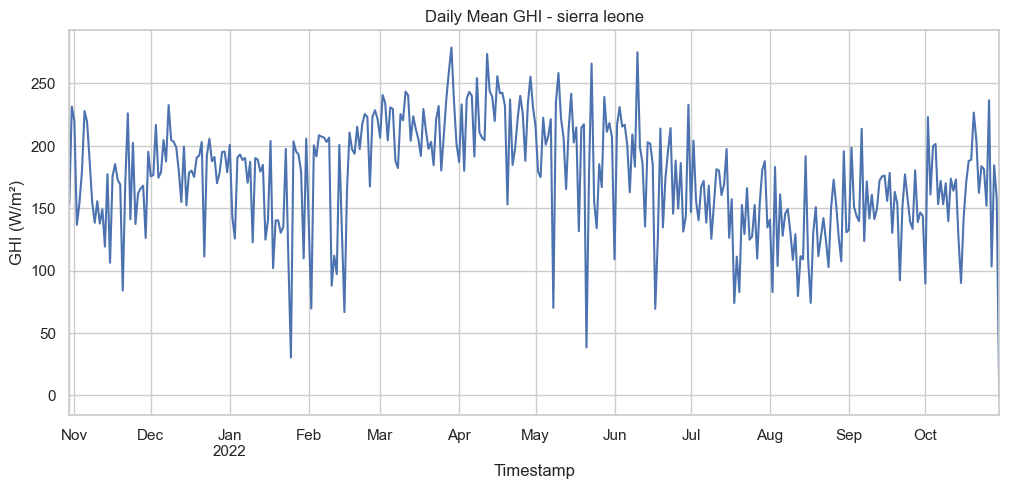

In [6]:
# Convert timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('GHI Variation Over Time - sierra leone')
plt.legend()
plt.show()

#daily averages for smoother trends:
df_daily = df_clean.set_index('Timestamp').resample('D').mean(numeric_only=True)
df_daily['GHI'].plot(figsize=(12,5), title='Daily Mean GHI - sierra leone')
plt.ylabel("GHI (W/m²)")
plt.show()

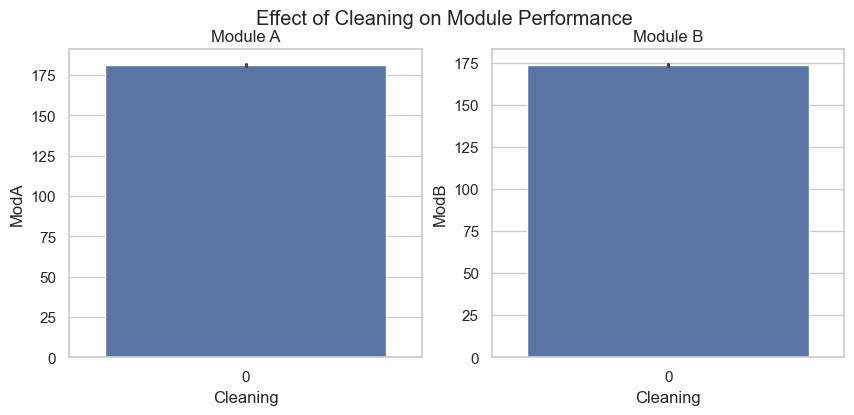

In [7]:
if "Cleaning" in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.barplot(x="Cleaning", y="ModA", data=df_clean, ax=axes[0])
    sns.barplot(x="Cleaning", y="ModB", data=df_clean, ax=axes[1])
    axes[0].set_title("Module A")
    axes[1].set_title("Module B")
    plt.suptitle("Effect of Cleaning on Module Performance")
    plt.show()
else:
    print("⚠️ No 'Cleaning' column found in dataset.")

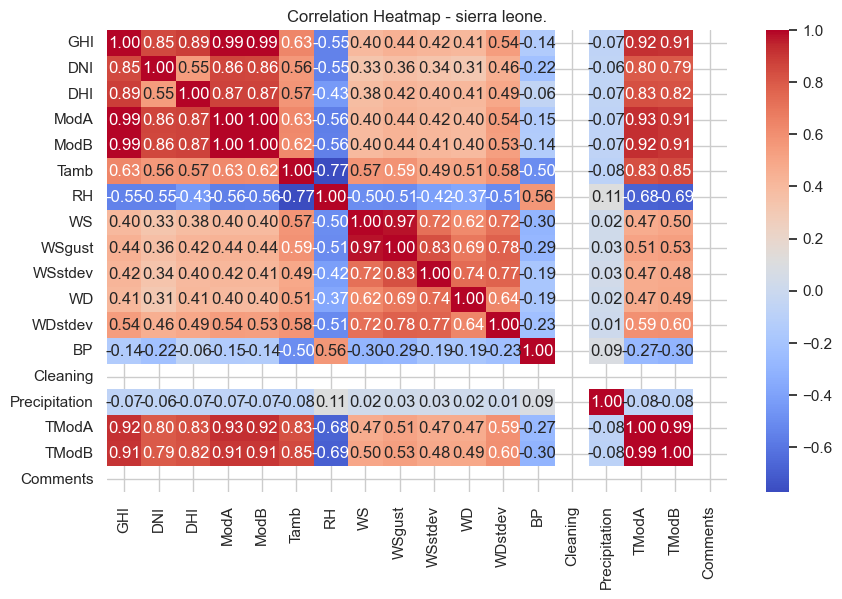

In [8]:
corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
#sns.heatmap(corr, cmap='coolwarm', annot=False)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap - sierra leone.")
plt.show()


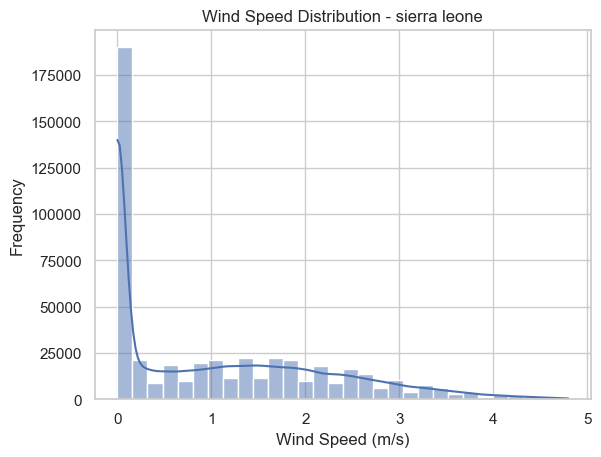

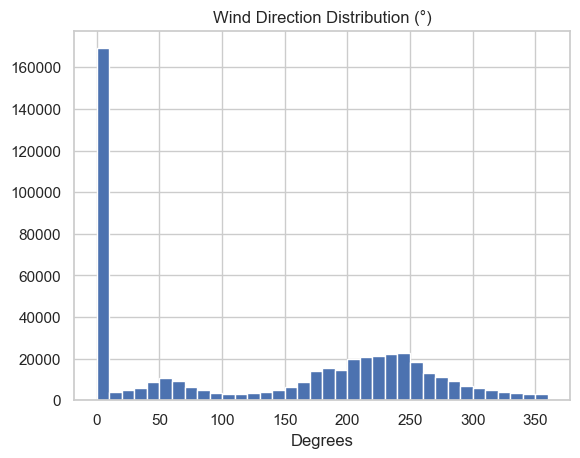

In [9]:
sns.histplot(df_clean["WS"], bins=30, kde=True)
plt.title("Wind Speed Distribution - sierra leone")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

if "WD" in df_clean.columns:
    df_clean["WD"].hist(bins=36)
    plt.title("Wind Direction Distribution (°)")
    plt.xlabel("Degrees")
    plt.show()
else:
    print("⚠️ No 'WD' column found in dataset.")

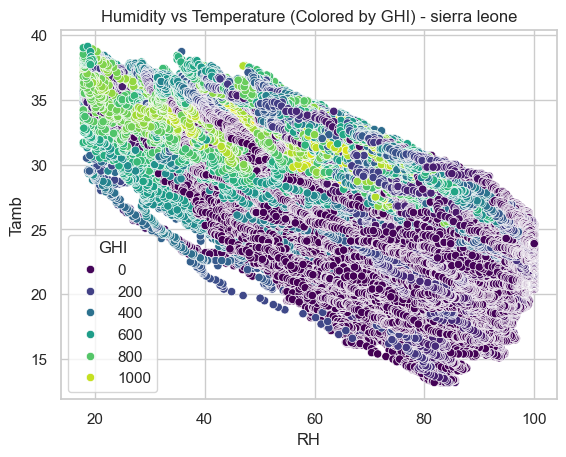

Correlation (Tamb vs GHI): 0.634724592564121
Correlation (RH vs GHI): -0.5472639924502279


In [10]:
sns.scatterplot(x="RH", y="Tamb", hue="GHI", data=df_clean, palette="viridis")
plt.title("Humidity vs Temperature (Colored by GHI) - sierra leone")
plt.show()

print("Correlation (Tamb vs GHI):", df_clean['Tamb'].corr(df_clean['GHI']))
print("Correlation (RH vs GHI):", df_clean['RH'].corr(df_clean['GHI']))

In [11]:
os.makedirs("../data/clean", exist_ok=True)
df_clean.to_csv("../data/clean/sierra_leone-malanville-clean.csv", index=False)
print("✅ data/clean/sierra leone-malanville-clean.csv")

✅ data/clean/sierra leone-malanville-clean.csv
